#Importação

In [1]:
import pandas as pd
from google.colab import drive
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
 drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/cr.io/Gestão/Projetos/Projetos/IEEE/Redes Neurais/creditcard.csv')

# Tratamento

- 'Class' deve conter apenas 1 e 0

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
df['Class'].value_counts()

,count
Class,
0,284315
1,492


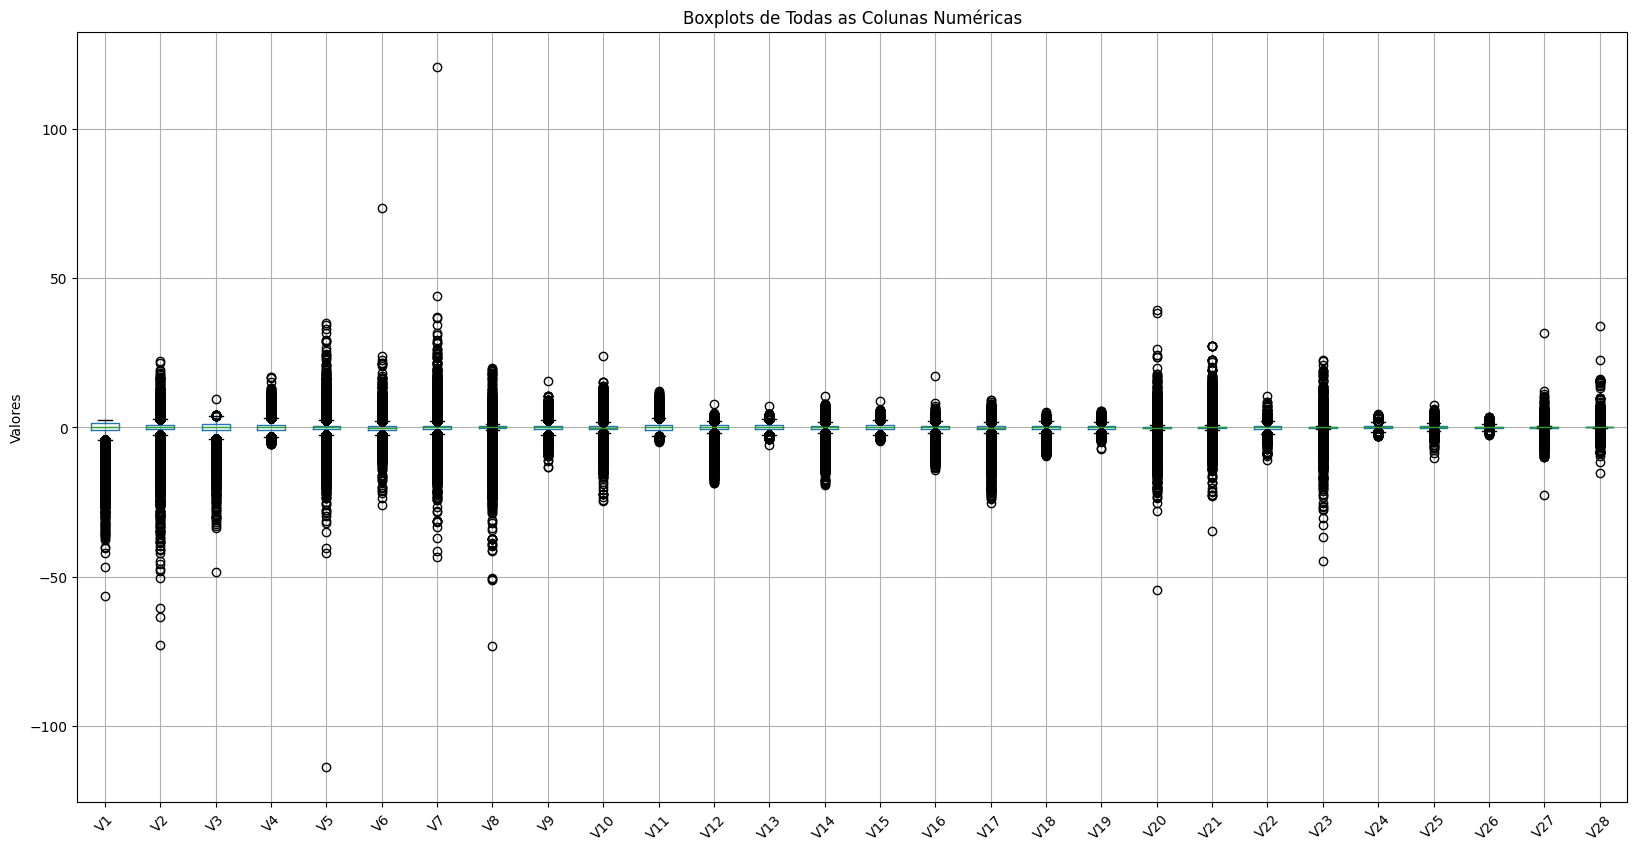

In [7]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
numeric_columns.remove('Time')
numeric_columns.remove('Amount')
numeric_columns.remove('Class')

# Ajustar o tamanho da figura
plt.figure(figsize=(20, 10))

# Criar boxplot para todas as colunas numéricas
df.boxplot(column=numeric_columns)

# Rotacionar os rótulos do eixo x para melhor visualização
plt.xticks(rotation=45)

# Título e labels
plt.title('Boxplots de Todas as Colunas Numéricas')
plt.ylabel('Valores')

# Mostrar o gráfico
plt.show()

# Análises

- Análises de distribuição de classes
- Entendimento de variáveis

In [8]:
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,94813.86,47488.15,0.00,54201.50,84692.00,139320.50,172792.00
V1,284807.0,0.00,1.96,-56.41,-0.92,0.02,1.32,2.45
V2,284807.0,0.00,1.65,-72.72,-0.60,0.07,0.80,22.06
V3,284807.0,-0.00,1.52,-48.33,-0.89,0.18,1.03,9.38
V4,284807.0,0.00,1.42,-5.68,-0.85,-0.02,0.74,16.88
V5,284807.0,0.00,1.38,-113.74,-0.69,-0.05,0.61,34.80
V6,284807.0,0.00,1.33,-26.16,-0.77,-0.27,0.40,73.30
V7,284807.0,-0.00,1.24,-43.56,-0.55,0.04,0.57,120.59
V8,284807.0,0.00,1.19,-73.22,-0.21,0.02,0.33,20.01
V9,284807.0,-0.00,1.10,-13.43,-0.64,-0.05,0.60,15.59


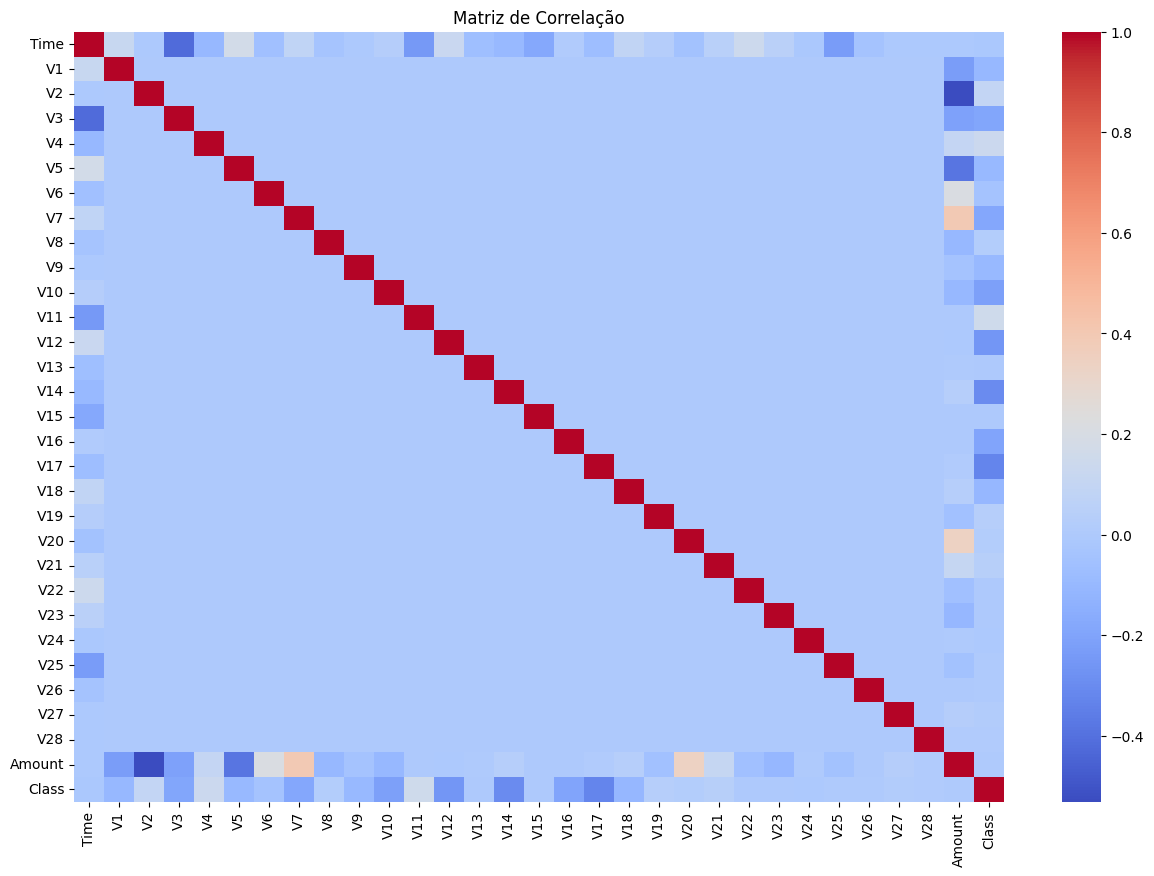

In [9]:
correlation_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

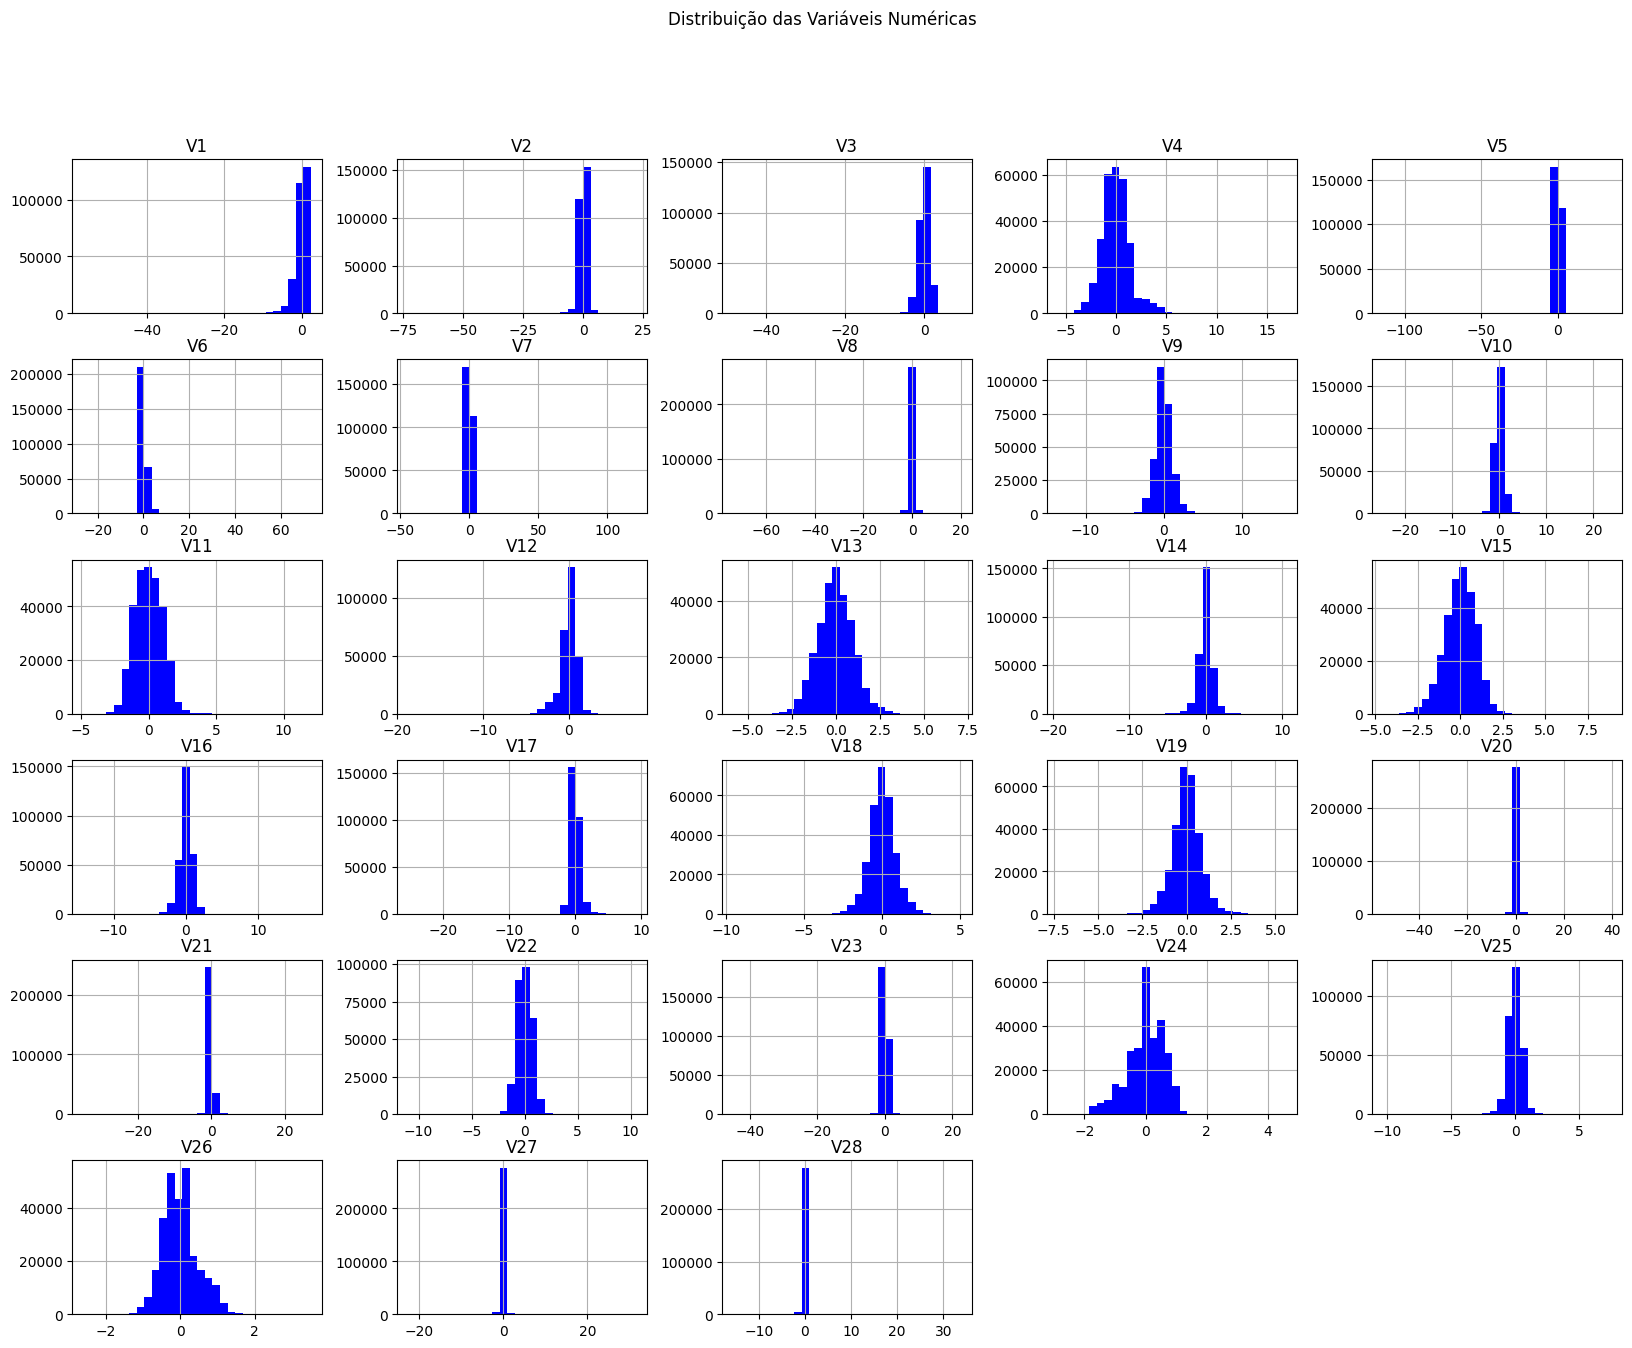

In [10]:
df[numeric_columns].hist(bins=30, figsize=(20, 15), color='blue')
plt.suptitle('Distribuição das Variáveis Numéricas')
plt.show()


# Modelo

## Preparação dos dados

- Separação de features e labels
- Divisão em train e test

In [11]:
# Separar as features (todas as colunas menos 'Class')
X = df.drop(columns=['Class'])

# Separar a label (coluna 'Class')
y = df['Class']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Criação da rede neural

Inicialização dos pesos

In [13]:
# Inicializar pesos com uma distribuição normal
# Para simplicidade, vamos considerar 1 camada oculta com 10 neurônios
input_size = X_train.shape[1]  # Número de features
hidden_layer_size = 10
output_size = 1  # Saída binária (fraude ou não)

# Pesos para a camada de entrada para a camada oculta
W1 = np.random.randn(input_size, hidden_layer_size)

# Bias para a camada oculta
b1 = np.zeros((1, hidden_layer_size))

# Pesos para a camada oculta para a camada de saída
W2 = np.random.randn(hidden_layer_size, output_size)

# Bias para a camada de saída
b2 = np.zeros((1, output_size))

**Definição da estrutura da rede**

A rede neural que vamos construir terá a seguinte estrutura:

Camada de Entrada: Número de neurônios igual ao número de features no dataset.
Camada Oculta: Você pode definir o número de neurônios, por exemplo, 10 neurônios.
Camada de Saída: 1 neurônio para prever se a transação é fraudulenta ou não.

Função de ativação

In [14]:
# Função ReLU
def relu(Z):
    return np.maximum(0, Z)

# Derivada da Função ReLU
def relu_derivative(Z):
    return Z > 0

# Função Sigmoide
def sigmoid(Z):
    return 1 / (1 + np.exp(-Z))

# Derivada da Função Sigmoide
def sigmoid_derivative(Z):
    return sigmoid(Z) * (1 - sigmoid(Z))

Forward pass

In [15]:
def forward_pass(X):
    # Camada oculta
    Z1 = np.dot(X, W1) + b1
    A1 = relu(Z1)

    # Camada de saída
    Z2 = np.dot(A1, W2) + b2
    A2 = sigmoid(Z2)

    return Z1, A1, Z2, A2


## Cálculo do erro e backpropagation

Função de custo

In [16]:
# Binary Cross-Entropy
def compute_cost(A2, Y):
    m = Y.shape[0]  # Número de exemplos
    cost = -np.sum(Y * np.log(A2) + (1 - Y) * np.log(1 - A2)) / m
    cost = np.squeeze(cost)  # Garante que o custo seja um número e não uma matriz
    return cost


Backpropagation

In [17]:
# Gradientes da camada de saída
def backward_pass(X, Y, Z1, A1, Z2, A2):
    m = X.shape[0]

    # Gradiente do custo em relação à saída da rede (A2)
    dZ2 = A2 - Y

    # Gradiente do custo em relação aos pesos da camada de saída (W2)
    dW2 = np.dot(A1.T, dZ2) / m

    # Gradiente do custo em relação ao bias da camada de saída (b2)
    db2 = np.sum(dZ2, axis=0, keepdims=True) / m

    # Gradiente do custo em relação à ativação da camada oculta (A1)
    dA1 = np.dot(dZ2, W2.T)

    # Gradiente do custo em relação à saída da camada oculta (Z1)
    dZ1 = dA1 * relu_derivative(Z1)

    # Gradiente do custo em relação aos pesos da camada oculta (W1)
    dW1 = np.dot(X.T, dZ1) / m

    # Gradiente do custo em relação ao bias da camada oculta (b1)
    db1 = np.sum(dZ1, axis=0, keepdims=True) / m

    return dW1, db1, dW2, db2



In [18]:
# Atualização dos pesos
def update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate):
    # Atualizar pesos e bias da camada oculta
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1

    # Atualizar pesos e bias da camada de saída
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2

    return W1, b1, W2, b2


## Treinamento do modelo

Inicialização dos parâmetros

In [19]:
# Inicialização dos parâmetros
def initialize_parameters(input_size, hidden_layer_size, output_size):
    W1 = np.random.randn(input_size, hidden_layer_size) * 0.01
    b1 = np.zeros((1, hidden_layer_size))
    W2 = np.random.randn(hidden_layer_size, output_size) * 0.01
    b2 = np.zeros((1, output_size))
    return W1, b1, W2, b2

# Parâmetros do modelo
learning_rate = 0.01
num_epochs = 1000

# Inicializar pesos
W1, b1, W2, b2 = initialize_parameters(X_train.shape[1], hidden_layer_size, output_size)


Iteração e atualização de pesos

In [ ]:
# Parâmetros do modelo
learning_rate = 0.01
num_epochs = 1000
hidden_layer_size = 10  # Exemplo, ajuste conforme necessário
output_size = 1  # Para classificação binária

# Inicializar pesos
W1, b1, W2, b2 = initialize_parameters(X_train.shape[1], hidden_layer_size, output_size)

# Lista para armazenar o custo durante o treinamento
train_costs = []
test_costs = []

for epoch in range(num_epochs):
    # Forward pass
    Z1, A1, Z2, A2 = forward_pass(X_train)

    # Cálculo do custo
    train_cost = compute_cost(A2, y_train)

    # Backward pass
    dW1, db1, dW2, db2 = backward_pass(X_train, y_train, Z1, A1, Z2, A2)

    # Atualização dos parâmetros
    W1, b1, W2, b2 = update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate)

    # Armazenar o custo de treinamento
    train_costs.append(train_cost)

    # Avaliar o custo no conjunto de teste a cada 100 épocas
    if epoch % 100 == 0:
        _, _, _, A2_test = forward_pass(X_test)
        test_cost = compute_cost(A2_test, y_test)
        test_costs.append(test_cost)
        print(f"Epoch {epoch}, Train Cost: {train_cost}, Test Cost: {test_cost}")

Identificação de overfitting e underfitting

In [ ]:
# Análise de Custo

import matplotlib.pyplot as plt

# Plotar o custo de treinamento e teste
plt.plot(train_costs, label='Train Cost')
plt.plot(test_costs, label='Test Cost')
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Training and Testing Cost')
plt.legend()
plt.show()


## Avaliação do modelo

Métricas de avaliação

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Fazer previsões no conjunto de teste
y_pred = predict(X_test)

# Acurácia
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia: {accuracy:.2f}")

# Precisão
precision = precision_score(y_test, y_pred)
print(f"Precisão: {precision:.2f}")

# Revocação
recall = recall_score(y_test, y_pred)
print(f"Revocação: {recall:.2f}")

# F1-Score
f1 = f1_score(y_test, y_pred)
print(f"F1-Score: {f1:.2f}")

# Matriz de Confusão
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusão:")
print(conf_matrix)

# ROC-AUC
roc_auc = roc_auc_score(y_test, y_pred)
print(f"ROC-AUC: {roc_auc:.2f}")

# Plotar a curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

Salvamento do modelo

In [ ]:
import joblib

# Salvar o modelo treinado
joblib.dump((W1, b1, W2, b2), 'modelo_rede_neural.pkl')

# Carregar o modelo treinado
W1, b1, W2, b2 = joblib.load('modelo_rede_neural.pkl')


## Testes finais e interpretação

Aplicação no conjunto de teste

In [ ]:
# Prever as classes para o conjunto de teste
y_test_pred = predict(X_test)

# Calcular métricas no conjunto de teste
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
test_roc_auc = roc_auc_score(y_test, y_test_pred)

# Exibir as métricas
print(f"Acurácia no Teste: {test_accuracy:.2f}")
print(f"Precisão no Teste: {test_precision:.2f}")
print(f"Revocação no Teste: {test_recall:.2f}")
print(f"F1-Score no Teste: {test_f1:.2f}")
print(f"ROC-AUC no Teste: {test_roc_auc:.2f}")

print("Matriz de Confusão no Teste:")
print(test_conf_matrix)


Análise de resultados